In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Path to your main directory containing subdirectories for each class
data_dir = 'train'

# Load the dataset from the directory
# You can set parameters like batch_size, image_size, etc.
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,  # Shuffle the data
    batch_size=32,  # Define batch size
    image_size=(224, 224),  # Resize images to 224x224
    label_mode='categorical',  # 'int' for integer labels, 'categorical' for one-hot encoded
    seed=123,  # Seed for reproducibility
)

Found 15557 files belonging to 23 classes.


In [4]:
train_dataset.class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

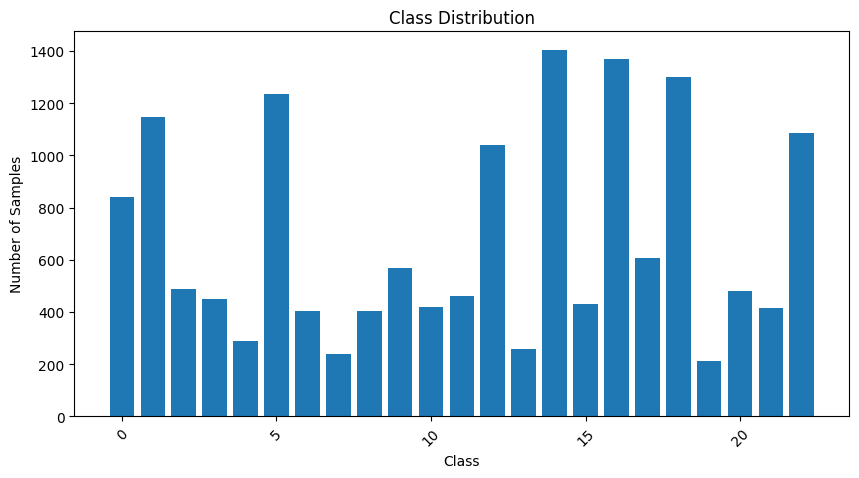

In [ ]:
# Extract class names from the dataset
class_names = train_dataset.class_names

# Count the number of samples per class
class_counts = [0] * len(class_names)
for images, labels in train_dataset:
    for label in labels.numpy():
        class_counts[label.argmax()] += 1

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(range(len(class_names)), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
first_img_batch = next(iter(train_dataset))
print(type(first_img_batch)) 
print(first_img_batch[0].shape)  # (32, 224, 224, 3) 32 images of size 224x224 with 3 channels
print(first_img_batch[1].shape)  # (32, 23) 32 one-hot encoded labels

<class 'tuple'>
(32, 224, 224, 3)
(32, 23)


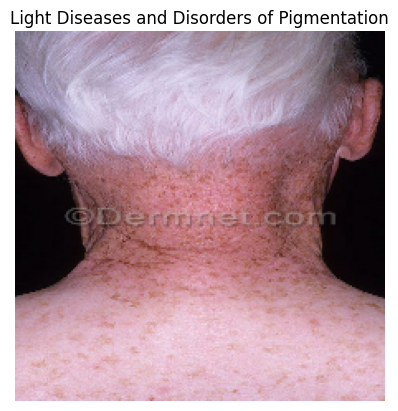

In [ ]:
first_img = first_img_batch[0][0]  # First image of the first batch
first_label = first_img_batch[1][0]  # First label of the first batch

# Display the first image
plt.imshow(first_img.numpy().astype('uint8'))
plt.axis('off')
plt.title(class_names[first_label.numpy().argmax()])
plt.show()
